# Training on VM

In [ ]:
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
GPU available: False
Number of GPUs:  0


In [2]:
os.getcwd()

'/users/eleves-b/2024/mattia.martino'

In [3]:
model = YOLO('yolo11n.pt')

In [4]:
def delete_images_without_labels(dataset_path, image_extensions=('jpg', 'png'), label_extension='txt'):
    """
    Deletes all images that do not have a corresponding label in the YOLO dataset.

    Parameters:
        dataset_path (str): Path to the dataset folder containing 'images' and 'labels' directories.
        image_extensions (tuple): Allowed image file extensions.
        label_extension (str): Extension of label files.

    Returns:
        list: A list of deleted image file paths.
    """
    images_path = os.path.join(dataset_path, "images")
    labels_path = os.path.join(dataset_path, "labels")

    image_files = {os.path.splitext(f)[0]: os.path.join(images_path, f)
                   for f in os.listdir(images_path) if f.split('.')[-1].lower() in image_extensions}
    label_files = {os.path.splitext(f)[0]: os.path.join(labels_path, f)
                   for f in os.listdir(labels_path) if f.endswith(label_extension)}

    deleted_images = []

    for img_name, img_path in image_files.items():
        if img_name not in label_files:
            try:
                os.remove(img_path)
                deleted_images.append(img_path)
            except Exception as e:
                print(f"Failed to delete {img_path}: {e}")

    return deleted_images


# Example usage
dataset_path = "synthetic_dataset/train"  # Replace with your dataset path
deleted_files = delete_images_without_labels(dataset_path)

# Print the results
print(f"Deleted {len(deleted_files)} images:")
for file in deleted_files:
    print(f" - {file}")

Deleted 0 images:


In [6]:
model.train(
    data='synthetic_dataset/data.yaml',
    epochs=10,
    imgsz=640,
    batch=8,
    workers=8,
    device=0
)

New https://pypi.org/project/ultralytics/8.3.48 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.12.2 torch-2.5.1 CUDA:0 (NVIDIA RTX A4000, 16080MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=synthetic_dataset/data.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=F

train: Scanning /users/eleves-b/2024/mattia.martino/synthetic_dataset/train/labels... 12591 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12591/12591 [00:16<00:00, 782.35it/s]


train: New cache created: /users/eleves-b/2024/mattia.martino/synthetic_dataset/train/labels.cache


val: Scanning /users/eleves-b/2024/mattia.martino/synthetic_dataset/val/labels... 2083 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2083/2083 [00:02<00:00, 820.88it/s]


val: New cache created: /users/eleves-b/2024/mattia.martino/synthetic_dataset/val/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000167, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      1.45G     0.4147      3.101     0.8718         38        640: 100%|██████████| 1574/1574 [08:07<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 131/131 [01:14<00:00,  1.75it/s]


                   all       2083      13972      0.351      0.559      0.389      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      1.34G     0.2835      1.153     0.8434         44        640: 100%|██████████| 1574/1574 [05:24<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 131/131 [01:13<00:00,  1.77it/s]


                   all       2083      13972      0.927      0.904      0.961      0.944

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      1.33G     0.2446     0.6432     0.8168         50        640: 100%|██████████| 1574/1574 [05:23<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 131/131 [01:13<00:00,  1.77it/s]


                   all       2083      13972      0.988       0.96      0.989      0.979

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      1.33G     0.2207     0.4903     0.8042         42        640: 100%|██████████| 1574/1574 [05:22<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 131/131 [01:13<00:00,  1.78it/s]


                   all       2083      13972      0.986      0.968      0.992      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      1.33G     0.2043     0.4215     0.7966         49        640: 100%|██████████| 1574/1574 [05:24<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 131/131 [01:13<00:00,  1.77it/s]


                   all       2083      13972       0.99      0.975      0.994      0.991

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      1.34G     0.1898     0.3775     0.7903         42        640: 100%|██████████| 1574/1574 [05:24<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 131/131 [01:13<00:00,  1.77it/s]


                   all       2083      13972       0.99      0.982      0.994      0.992

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      1.33G     0.1808     0.3463     0.7883         44        640: 100%|██████████| 1574/1574 [05:23<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 131/131 [01:13<00:00,  1.78it/s]


                   all       2083      13972      0.991      0.984      0.995      0.994

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      1.34G     0.1738     0.3214     0.7847         50        640: 100%|██████████| 1574/1574 [05:23<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 131/131 [01:13<00:00,  1.77it/s]


                   all       2083      13972      0.995      0.988      0.995      0.994

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      1.32G     0.1673      0.305     0.7831         55        640: 100%|██████████| 1574/1574 [05:24<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 131/131 [01:13<00:00,  1.77it/s]


                   all       2083      13972      0.994       0.99      0.995      0.994

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      1.32G     0.1626     0.2912      0.782         47        640: 100%|██████████| 1574/1574 [05:23<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 131/131 [01:13<00:00,  1.78it/s]


                   all       2083      13972      0.995      0.991      0.995      0.994

10 epochs completed in 1.152 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.12.2 torch-2.5.1 CUDA:0 (NVIDIA RTX A4000, 16080MiB)
YOLO11n summary (fused): 238 layers, 2,593,072 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 131/131 [01:58<00:00,  1.11it/s]


                   all       2083      13972      0.995      0.991      0.995      0.994
                    2C        198        198          1      0.959      0.994      0.993
                    2D        208        208      0.995      0.986      0.995      0.993
                    2H        190        190      0.987      0.989      0.995      0.993
                    2S        204        204          1      0.979      0.995      0.994
                    3C        204        204      0.995          1      0.995      0.995
                    3D        192        192      0.992      0.984      0.995      0.995
                    3H        217        217      0.991          1      0.995      0.995
                    3S        193        193          1      0.982      0.995      0.993
                    4C        192        192          1      0.996      0.995      0.994
                    4D        217        217          1      0.986      0.995      0.994
                    4

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fa7141966f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.03

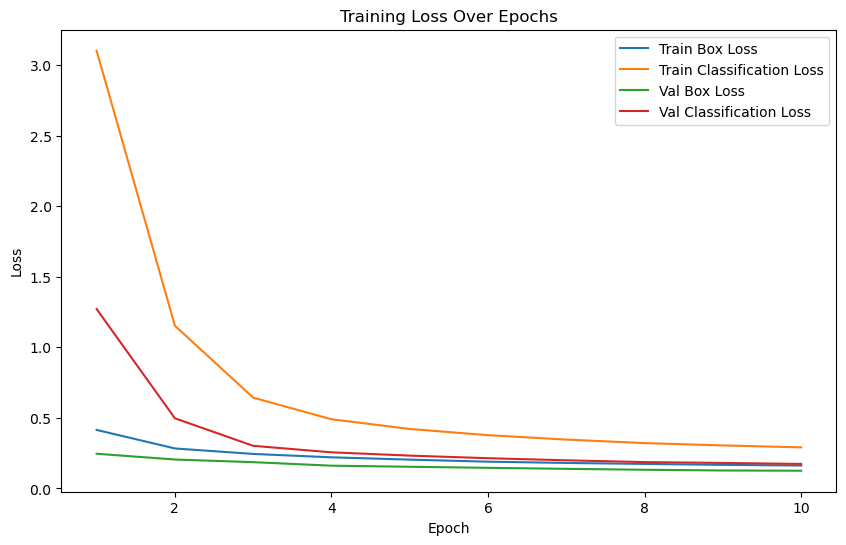

In [21]:
results_path = "runs/detect/train2/results.csv"  # Update with your path
results = pd.read_csv(results_path)

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(results["epoch"], results["train/box_loss"], label="Train Box Loss")
plt.plot(results["epoch"], results["train/cls_loss"], label="Train Classification Loss")
plt.plot(results["epoch"], results['val/box_loss'], label="Val Box Loss")
plt.plot(results["epoch"], results['val/cls_loss'], label="Val Classification Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.show()

In [22]:
results

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,562.757,0.41470,3.10051,0.87178,0.35065,0.55905,0.38937,0.37236,0.24603,1.27104,0.82198,0.000056,0.000056,0.000056
1,2,962.084,0.28349,1.15252,0.84341,0.92708,0.90379,0.96054,0.94380,0.20505,0.49698,0.79757,0.000100,0.000100,0.000100
2,3,1359.850,0.24463,0.64323,0.81678,0.98815,0.96006,0.98873,0.97943,0.18631,0.30212,0.78622,0.000134,0.000134,0.000134
3,4,1756.830,0.22072,0.49027,0.80419,0.98640,0.96813,0.99196,0.98750,0.16147,0.25597,0.77857,0.000117,0.000117,0.000117
4,5,2155.480,0.20431,0.42151,0.79655,0.98966,0.97454,0.99381,0.99112,0.15375,0.23277,0.77481,0.000101,0.000101,0.000101
5,6,2554.070,0.18977,0.37752,0.79027,0.98996,0.98179,0.99435,0.99208,0.14627,0.21433,0.77223,0.000084,0.000084,0.000084
6,7,2951.990,0.18083,0.34625,0.78835,0.99074,0.98406,0.99454,0.99355,0.13911,0.19958,0.76975,0.000068,0.000068,0.000068
7,8,3350.130,0.17383,0.32141,0.78466,0.99463,0.98849,0.99471,0.99401,0.13252,0.18683,0.76791,0.000051,0.000051,0.000051
8,9,3748.680,0.16726,0.30496,0.78313,0.99426,0.99018,0.99484,0.99435,0.12751,0.18087,0.76701,0.000035,0.000035,0.000035
9,10,4146.150,0.16260,0.29122,0.78203,0.99537,0.99142,0.99486,0.99436,0.12575,0.17376,0.76649,0.000018,0.000018,0.000018


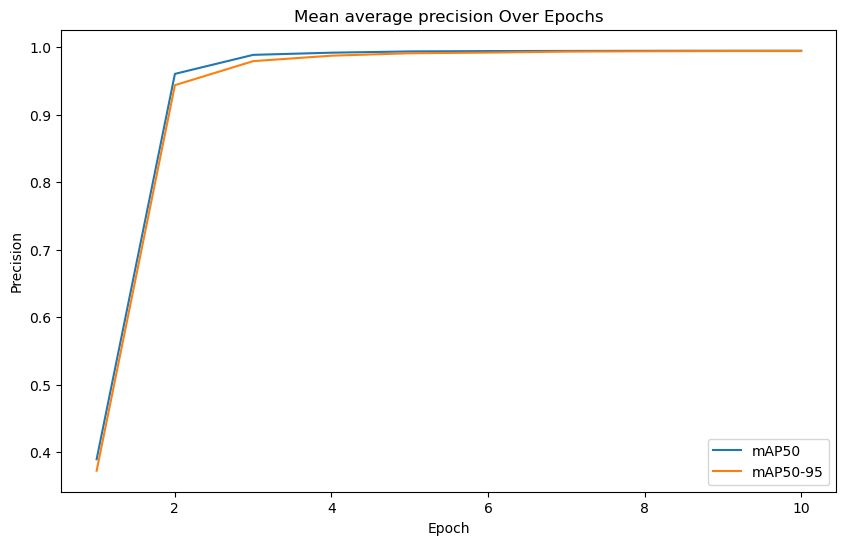

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(results["epoch"], results["metrics/mAP50(B)"], label="mAP50")
plt.plot(results["epoch"], results["metrics/mAP50-95(B)"], label="mAP50-95")
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.title("Mean average precision Over Epochs")
plt.legend()
plt.show()

In [25]:
metrics = model.val(data="synthetic_dataset/data.yaml", split="test")

Ultralytics 8.3.40 🚀 Python-3.12.2 torch-2.5.1 CUDA:0 (NVIDIA RTX A4000, 16080MiB)


val: Scanning /users/eleves-b/2024/mattia.martino/synthetic_dataset/test/labels... 2112 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2112/2112 [00:02<00:00, 796.09it/s]


val: New cache created: /users/eleves-b/2024/mattia.martino/synthetic_dataset/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 264/264 [02:02<00:00,  2.16it/s]


                   all       2112      14250      0.994      0.989      0.995      0.994
                    2C        211        211      0.996      0.962      0.994      0.994
                    2D        198        198      0.976      0.985      0.994      0.994
                    2H        198        198      0.984      0.958      0.994      0.994
                    2S        204        204      0.998      0.956      0.994      0.994
                    3C        206        206      0.994       0.99      0.995      0.995
                    3D        218        218          1      0.954      0.995      0.995
                    3H        190        190      0.983          1      0.995      0.995
                    3S        183        183          1       0.97      0.994      0.994
                    4C        217        217      0.999      0.995      0.995      0.995
                    4D        207        207      0.991       0.99      0.995      0.995
                    4

In [27]:
print(metrics)

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fa683c32de0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.03

In [3]:
model = YOLO("runs/detect/train6/weights/best.pt")

# Predict on a custom image
results = model.predict(source="./custom_images", save=True)

# Print results
print(results)

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


image 1/4 /Users/mattiamartino/Desktop/X/year1/iacv/project/poker-visual-engine/custom_images/IMG_0030.jpeg: 480x640 1 3D, 1 JS, 1 KC, 1 KS, 1 hand, 1 river, 300.2ms
image 2/4 /Users/mattiamartino/Desktop/X/year1/iacv/project/poker-visual-engine/custom_images/IMG_0067.jpeg: 640x480 (no detections), 215.1ms
image 3/4 /Users/mattiamartino/Desktop/X/year1/iacv/project/poker-visual-engine/custom_images/IMG_4595.jpeg: 640x480 1 5C, 1 QH, 1 hand, 1 river, 172.8ms
image 4/4 /Users/mattiamartino/Desktop/X/year1/iacv/project/poker-visual-engine/custom_images/average-hand-of-online-poker-v0-vt94cjwjwbkd1.png.webp: 352x640 1 6D, 1 6H, 1 7D, 1 KH, 1 QC, 1 TD, 1 hand, 1 river, 172.1ms
Speed: 3.4ms preprocess, 215.1ms inference, 3.7ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: '2C', 1: '2D', 2: '2H', 3: '2S', 4: '

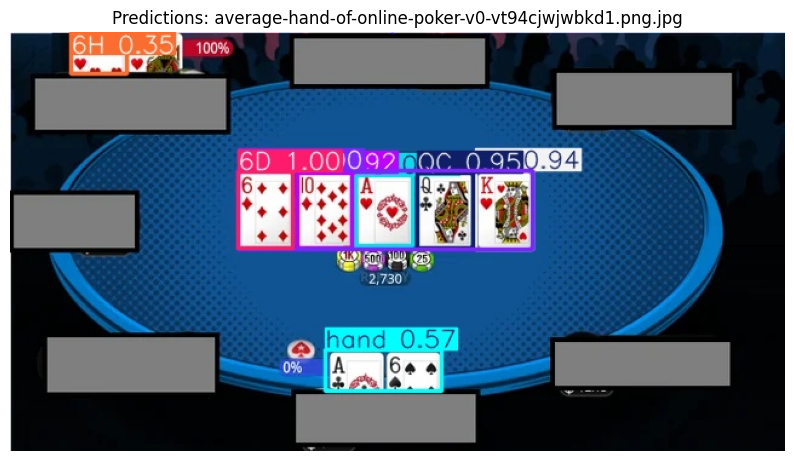

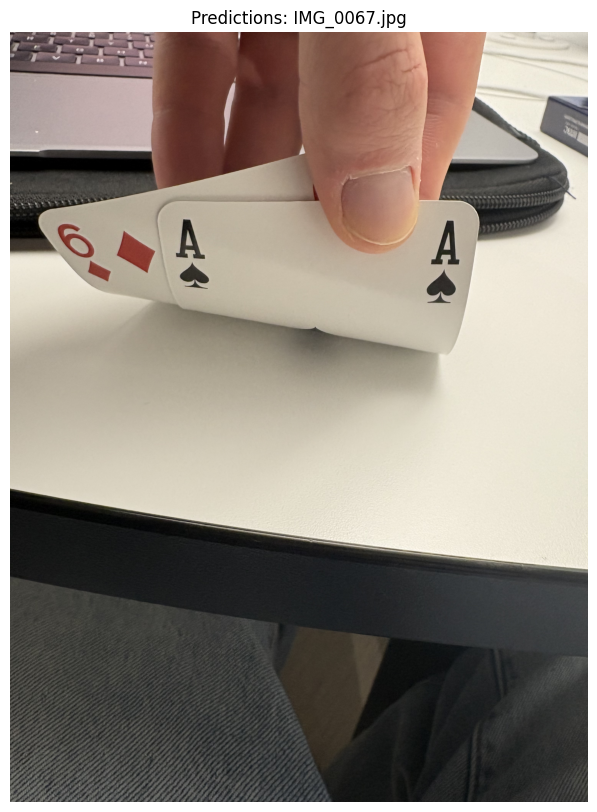

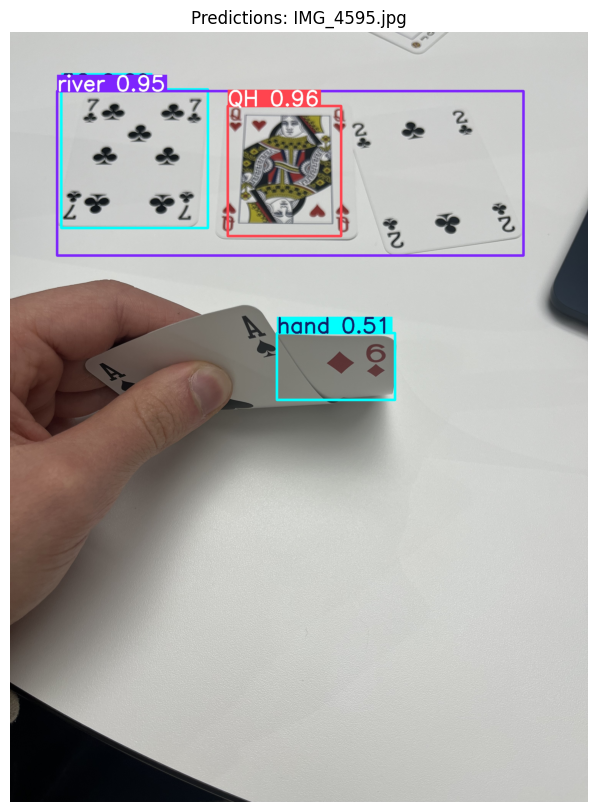

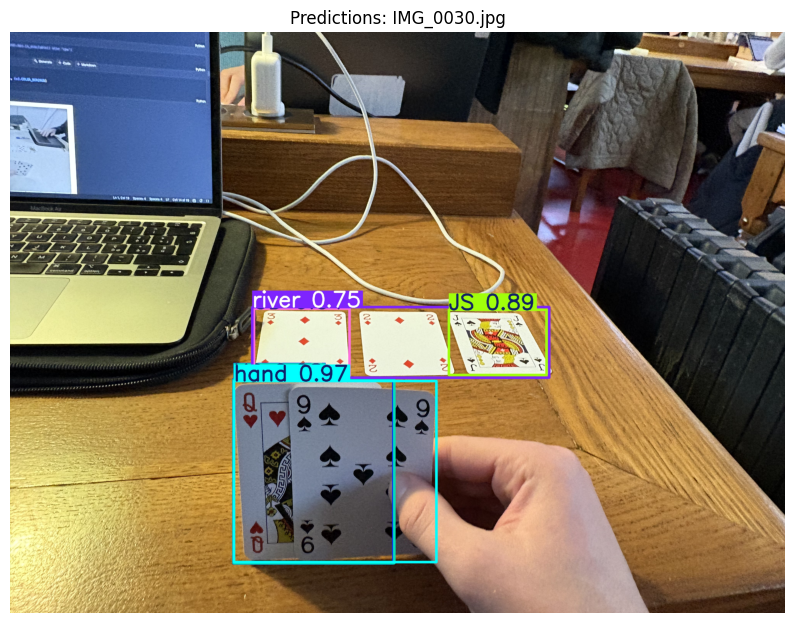

Image 1:
  Class: 52, Confidence: 0.97, Bounding Box: [1165.32177734375, 1818.806884765625, 2218.829345703125, 2759.27099609375]
  Class: 39, Confidence: 0.89, Bounding Box: [2283.068115234375, 1448.238037109375, 2791.956298828125, 1787.1456298828125]
  Class: 55, Confidence: 0.75, Bounding Box: [1260.0850830078125, 1434.8660888671875, 2805.218017578125, 1801.0643310546875]
  Class: 5, Confidence: 0.54, Bounding Box: [1269.8531494140625, 1442.935791015625, 1766.114990234375, 1798.0543212890625]
  Class: 43, Confidence: 0.28, Bounding Box: [1163.8572998046875, 1811.2518310546875, 1999.8826904296875, 2765.52880859375]
  Class: 40, Confidence: 0.27, Bounding Box: [1162.5723876953125, 1809.71875, 1994.0247802734375, 2766.010498046875]
Image 2:
Image 3:
  Class: 46, Confidence: 0.96, Bounding Box: [1139.5526123046875, 387.1699523925781, 1732.5797119140625, 1068.73828125]
  Class: 55, Confidence: 0.95, Bounding Box: [246.28599548339844, 309.4489440917969, 2686.887939453125, 1170.981689453125

In [5]:
import os
import cv2
import matplotlib.pyplot as plt

predicted_folder = "runs/detect/predict/"
predicted_images = [os.path.join(predicted_folder, f) for f in os.listdir(predicted_folder) if f.endswith(".jpg")]

# Display each predicted image
for img_path in predicted_images:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.title(f"Predictions: {os.path.basename(img_path)}")
    plt.axis("off")
    plt.show()

for idx, result in enumerate(results):
    print(f"Image {idx + 1}:")
    # Access the bounding boxes for the current image
    for box in result.boxes:
        cls = int(box.cls[0])  # Class index
        conf = float(box.conf[0])  # Confidence score
        xyxy = [float(x) for x in box.xyxy[0]]  # [x_min, y_min, x_max, y_max]
        
        # Print the bounding box details
        print(f"  Class: {cls}, Confidence: {conf:.2f}, Bounding Box: {xyxy}")